In [6]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import imutils
from imutils.perspective import four_point_transform 

In [7]:
img = cv.imread("G:\Program\Python\PyLearn\Image Processing\Assignment_28\sudoku_detector\sudoku1.jpg")
imgGray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

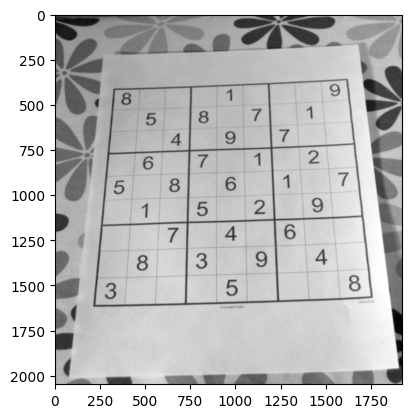

In [8]:
imgBlurred = cv.GaussianBlur(imgGray, (7,7), 3)
plt.imshow(imgBlurred, cmap="gray")

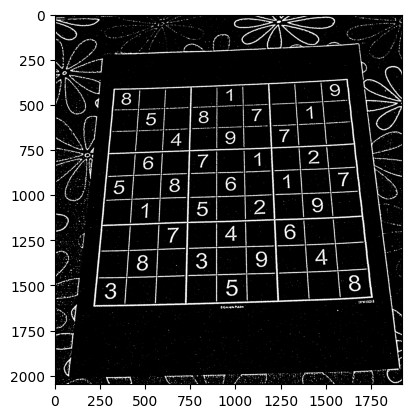

In [9]:
thresh = cv.adaptiveThreshold(imgBlurred, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY_INV, 11, 2)
plt.imshow(thresh, cmap="gray")

In [10]:
contours = cv.findContours(thresh, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
contours = contours[0]

In [11]:
contours = sorted(contours, key=cv.contourArea, reverse=True)

In [12]:
len(contours)

4376

In [13]:
sudoku_contour = None

for contour in contours:
    epsilon = 0.1 * cv.arcLength(contour, True)
    approx = cv.approxPolyDP(contour, epsilon, True)
    
    if len(approx) == 4:
        sudoku_contour = approx
        break

if sudoku_contour is None:
    print("can't find")

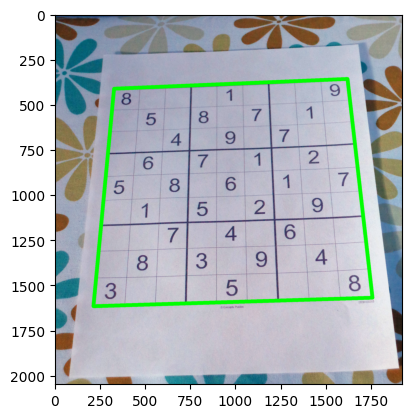

In [14]:
result = cv.drawContours(img, [sudoku_contour], -1, (0,255,0), 20)
plt.imshow(result)

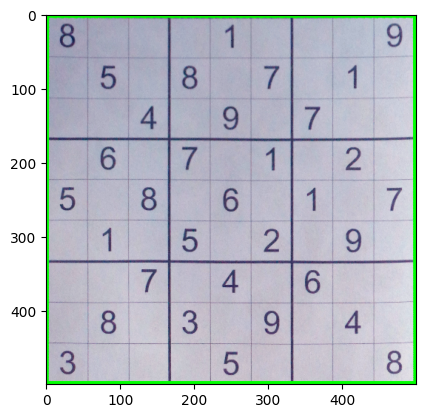

In [15]:
warped = four_point_transform(img, approx.reshape(4,2))
warped = cv.resize(warped, (500, 500))
plt.imshow(warped)